## Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



## Reading Csv file

In [7]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


## Different attributes of file 

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [12]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df.size

27860

##  Hot Label Encoding(v1)

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])
print(df)

      v1                                                 v2 Unnamed: 2  \
0      0  Go until jurong point, crazy.. Available only ...        NaN   
1      0                      Ok lar... Joking wif u oni...        NaN   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      0  U dun say so early hor... U c already then say...        NaN   
4      0  Nah I don't think he goes to usf, he lives aro...        NaN   
...   ..                                                ...        ...   
5567   1  This is the 2nd time we have tried 2 contact u...        NaN   
5568   0              Will Ì_ b going to esplanade fr home?        NaN   
5569   0  Pity, * was in mood for that. So...any other s...        NaN   
5570   0  The guy did some bitching but I acted like i'd...        NaN   
5571   0                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        N

## Converting words into vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['v2'])
y = df['v1']

## Train-Test Splitting of Data

In [33]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size =0.2,random_state= 78)

## Training the model

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train , y_train)

MultinomialNB()

## Prediction

In [35]:
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, roc_curve, roc_auc_score
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_pred , y_test)
print("accuracy:",accuracy)

accuracy: 0.9533632286995516


## Output Visualisation

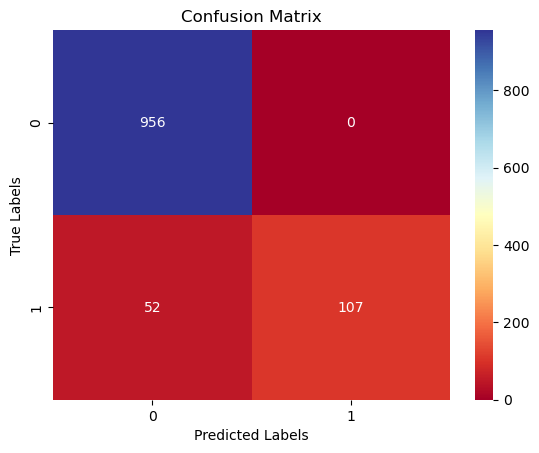

In [44]:
confusion = confusion_matrix(y_test,y_pred)
sns.heatmap(confusion ,annot =True, fmt='d', cmap='RdYlBu')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Classification Report

In [45]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       956
           1       1.00      0.67      0.80       159

    accuracy                           0.95      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.95      0.95      1115



## ROC Curve and AUC

In [51]:
y_pred_prob = classifier.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test == 'spam', y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8364779874213837


C:\Users\Lenovo\anaconda3\New folder\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


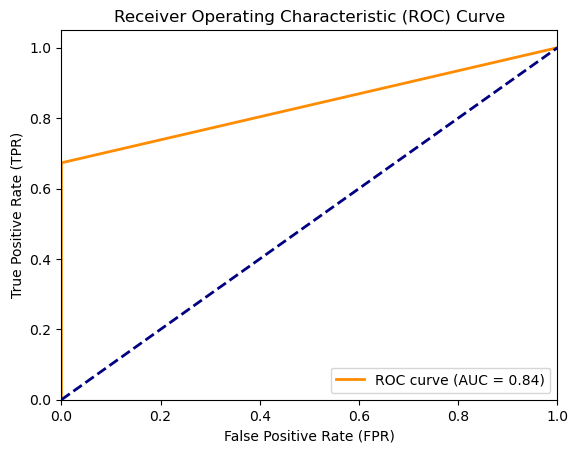

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


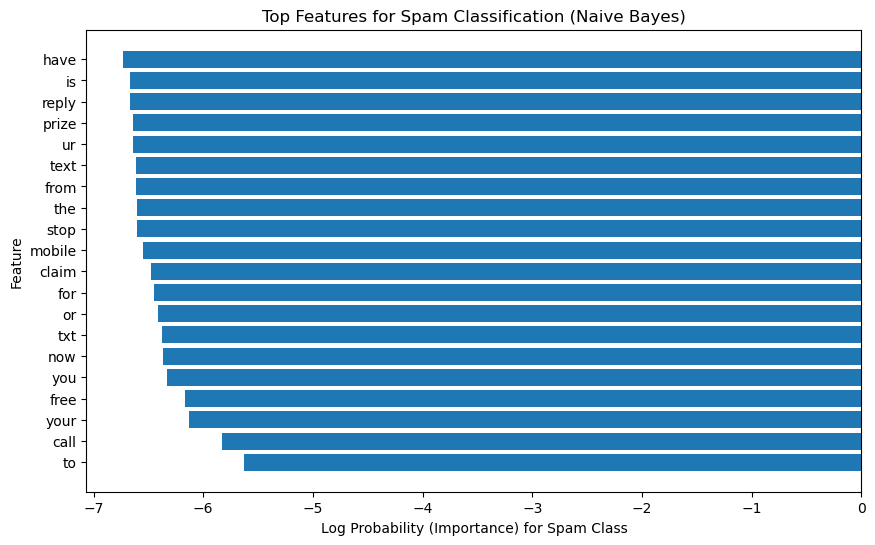

In [60]:
feature_names = vectorizer.get_feature_names_out()
top_n = 20  # Number of top features to display
spam_class_idx = label_encoder.transform([1])[0]
top_n = 20  # Number of top features to display
top_indices = classifier.feature_log_prob_[spam_class_idx].argsort()[-top_n:][::-1]
feature_names = vectorizer.get_feature_names_out()
top_features = [feature_names[i] for i in top_indices]
top_probabilities = classifier.feature_log_prob_[spam_class_idx][top_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_probabilities, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Log Probability (Importance) for Spam Class')
plt.ylabel('Feature')
plt.title('Top Features for Spam Classification (Naive Bayes)')
plt.show()